In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sb
from statannot import add_stat_annotation
from scipy.stats import mannwhitneyu

import matplotlib.patches as mpatches
from scipy.stats import wilcoxon, ttest_ind

from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.expand_frame_repr', True)
import warnings
warnings.filterwarnings('ignore')

path = '/home/ripper8/projects/working_data/GRNv3knockouts/analysis'
experiments = ['reg10m2', 'reg2m2']

In [2]:
traits = ['disp_y', 'distance', 'extremities_prop', 'symmetry']

df_traits = {}
for trait in traits:
    print('>>>>>',trait)
    df_traits[trait] = pd.read_csv(f'{path}/knockouts/data/effects_{trait}.csv')
    df_traits[trait]['epistasis_percent'] = df_traits[trait]['positive'] + df_traits[trait]['negative']
    df_traits[trait]['avg_negative']  = df_traits[trait]['avg_negative'] * -1

    display(df_traits[trait])
    

>>>>> disp_y


,Unnamed: 0,experiment_name,run,gen,ranking,individual_id,neutral,positive,negative,epistasis,avg_positive,avg_negative,epistasis_percent
0,0,reg10m2,1,0,best,46,0.984211,0.015789,0.000000,3,0.266903,NaN,0.015789
1,1,reg10m2,1,0,worst,74,0.985714,0.009524,0.004762,3,0.172441,0.013400,0.014286
2,2,reg10m2,1,100,best,9776,0.979310,0.014843,0.005847,138,1.534372,0.735045,0.020690
3,3,reg10m2,1,100,worst,10065,0.995765,0.000000,0.004235,7,NaN,0.824927,0.004235
4,4,reg10m2,2,0,best,5,0.990476,0.000000,0.009524,2,NaN,0.067191,0.009524
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,reg2m2,29,100,worst,10053,0.949434,0.022638,0.027928,478,0.136929,0.209586,0.050566
236,236,reg2m2,30,0,best,68,0.905263,0.063158,0.031579,18,0.323121,0.231499,0.094737
237,237,reg2m2,30,0,worst,33,0.871429,0.028571,0.100000,27,0.244396,0.407933,0.128571
238,238,reg2m2,30,100,best,9797,0.998894,0.000884,0.000221,10,1.557517,0.266415,0.001106


>>>>> distance


,Unnamed: 0,experiment_name,run,gen,ranking,individual_id,neutral,positive,negative,epistasis,avg_positive,avg_negative,epistasis_percent
0,0,reg10m2,1,0,best,46,0.984211,0.000000,0.015789,3,NaN,4.000000,0.015789
1,1,reg10m2,1,0,worst,74,0.985714,0.009524,0.004762,3,2.000000,5.000000,0.014286
2,2,reg10m2,1,100,best,9776,0.982309,0.007196,0.010495,118,4.395833,4.214286,0.017691
3,3,reg10m2,1,100,worst,10065,0.995765,0.000605,0.003630,7,7.000000,6.833333,0.004235
4,4,reg10m2,2,0,best,5,0.990476,0.009524,0.000000,2,2.000000,NaN,0.009524
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,reg2m2,29,100,worst,10053,0.957051,0.011425,0.031524,406,3.398148,3.469799,0.042949
236,236,reg2m2,30,0,best,68,0.905263,0.021053,0.073684,18,1.750000,5.928571,0.094737
237,237,reg2m2,30,0,worst,33,0.885714,0.004762,0.109524,24,4.000000,11.000000,0.114286
238,238,reg2m2,30,100,best,9797,0.998894,0.000221,0.000884,10,4.000000,2.625000,0.001106


>>>>> extremities_prop


,Unnamed: 0,experiment_name,run,gen,ranking,individual_id,neutral,positive,negative,epistasis,avg_positive,avg_negative,epistasis_percent
0,0,reg10m2,1,0,best,46,0.984211,0.000000,0.015789,3,NaN,0.333333,0.015789
1,1,reg10m2,1,0,worst,74,0.990476,0.004762,0.004762,2,0.333333,0.666667,0.009524
2,2,reg10m2,1,100,best,9776,0.981859,0.011994,0.006147,121,0.053224,0.171487,0.018141
3,3,reg10m2,1,100,worst,10065,0.995765,0.004235,0.000000,7,0.634921,NaN,0.004235
4,4,reg10m2,2,0,best,5,0.990476,0.000000,0.009524,2,NaN,0.666667,0.009524
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,reg2m2,29,100,worst,10053,0.981276,0.005712,0.013012,177,0.100529,0.125436,0.018724
236,236,reg2m2,30,0,best,68,0.936842,0.057895,0.005263,12,0.121645,0.071429,0.063158
237,237,reg2m2,30,0,worst,33,0.895238,0.080952,0.023810,22,0.268908,0.314286,0.104762
238,238,reg2m2,30,100,best,9797,0.998894,0.000221,0.000884,10,0.297619,0.151786,0.001106


>>>>> symmetry


,Unnamed: 0,experiment_name,run,gen,ranking,individual_id,neutral,positive,negative,epistasis,avg_positive,avg_negative,epistasis_percent
0,0,reg10m2,1,0,best,46,1.000000,0.000000,0.000000,0,NaN,NaN,0.000000
1,1,reg10m2,1,0,worst,74,0.990476,0.004762,0.004762,2,1.000000,1.000000,0.009524
2,2,reg10m2,1,100,best,9776,0.985157,0.008846,0.005997,99,0.256977,0.360421,0.014843
3,3,reg10m2,1,100,worst,10065,0.998790,0.001210,0.000000,2,0.777778,NaN,0.001210
4,4,reg10m2,2,0,best,5,0.990476,0.000000,0.009524,2,NaN,1.000000,0.009524
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,reg2m2,29,100,worst,10053,0.971226,0.022215,0.006559,272,0.167109,0.175608,0.028774
236,236,reg2m2,30,0,best,68,0.921053,0.042105,0.036842,15,0.172161,0.182365,0.078947
237,237,reg2m2,30,0,worst,33,0.895238,0.047619,0.057143,22,0.362482,0.187831,0.104762
238,238,reg2m2,30,100,best,9797,0.999005,0.000111,0.000884,9,0.200000,0.313095,0.000995


>>>>> disp_y
>> reg10m2

Metric: epistasis_percent, p-value: 0.1942

Metric: avg_positive, p-value: 0.0

Metric: avg_negative, p-value: 0.0


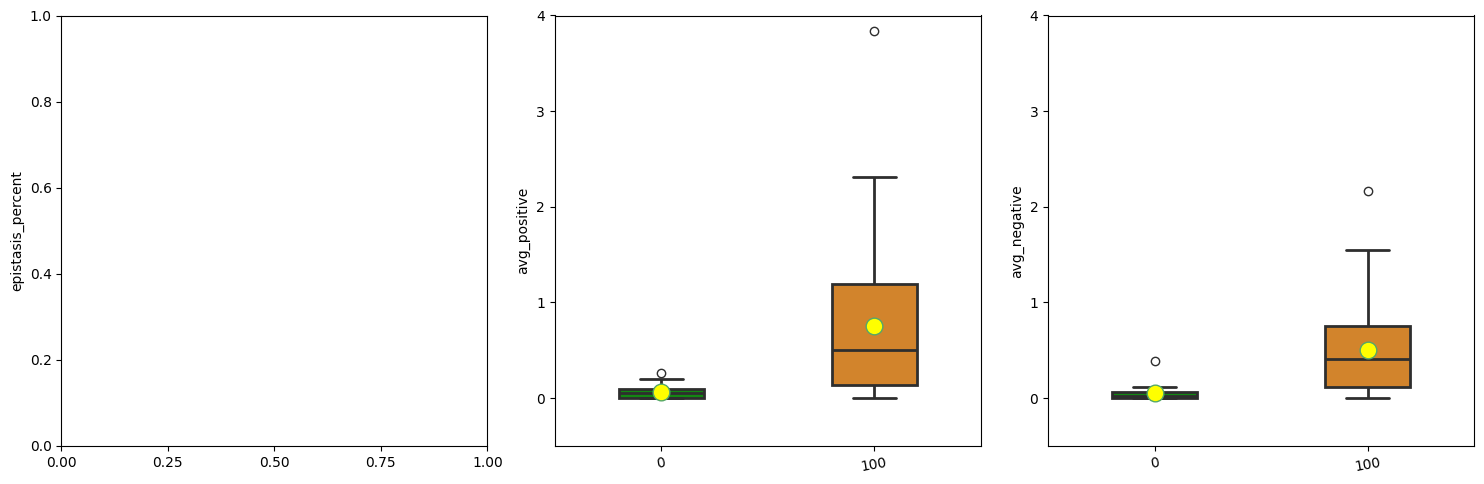

>> reg2m2

Metric: epistasis_percent, p-value: 0.0

Metric: avg_positive, p-value: 0.0

Metric: avg_negative, p-value: 0.0


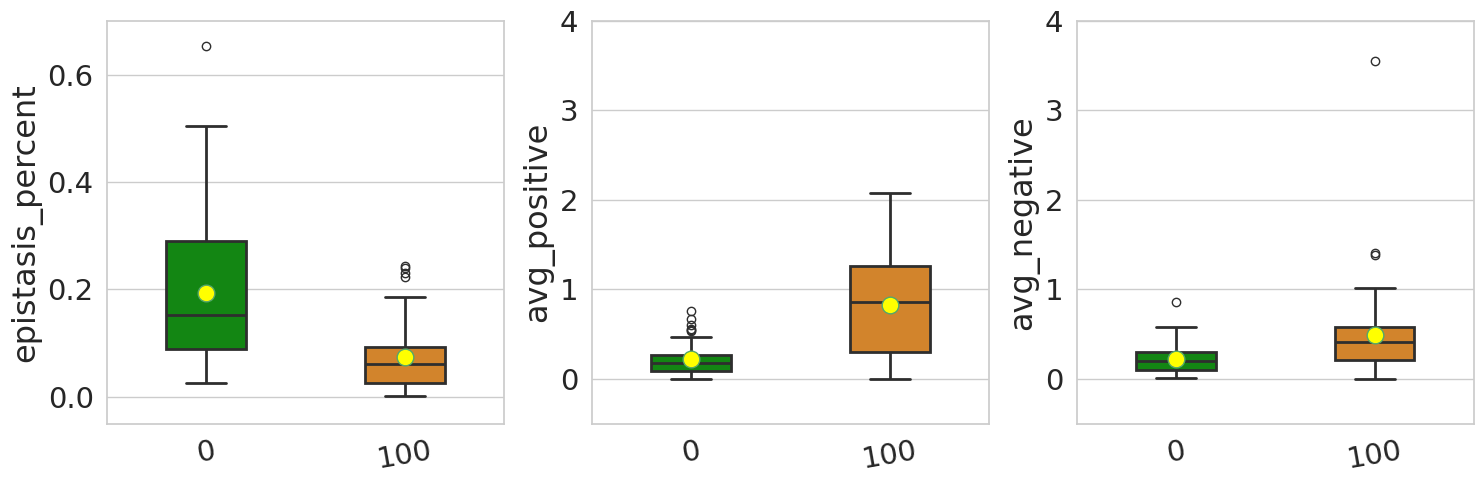

>>>>> distance
>> reg10m2

Metric: epistasis_percent, p-value: 0.0415

Metric: avg_positive, p-value: 0.082

Metric: avg_negative, p-value: 0.0005


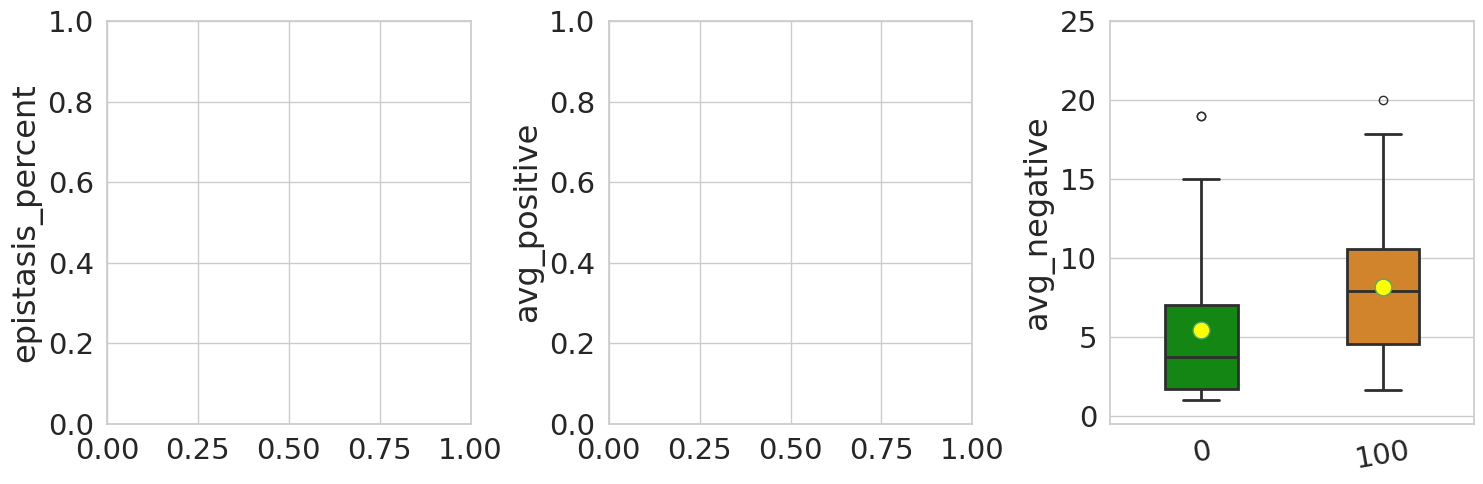

>> reg2m2

Metric: epistasis_percent, p-value: 0.0

Metric: avg_positive, p-value: 0.0868

Metric: avg_negative, p-value: 0.0001


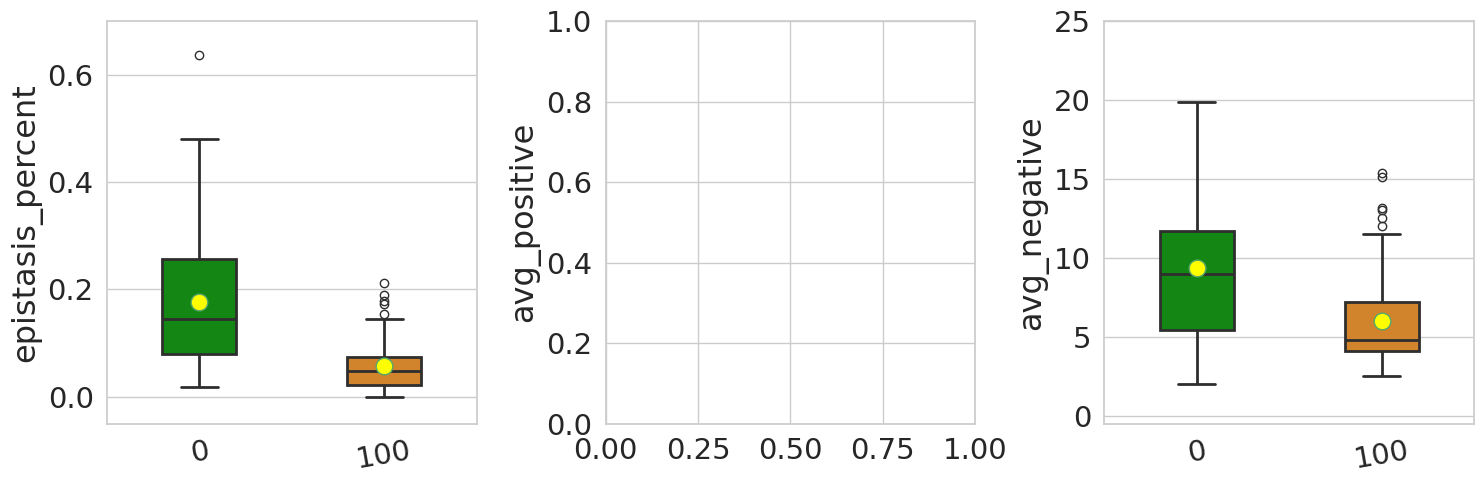

>>>>> extremities_prop
>> reg10m2

Metric: epistasis_percent, p-value: 0.3301

Metric: avg_positive, p-value: 0.0001

Metric: avg_negative, p-value: 0.0


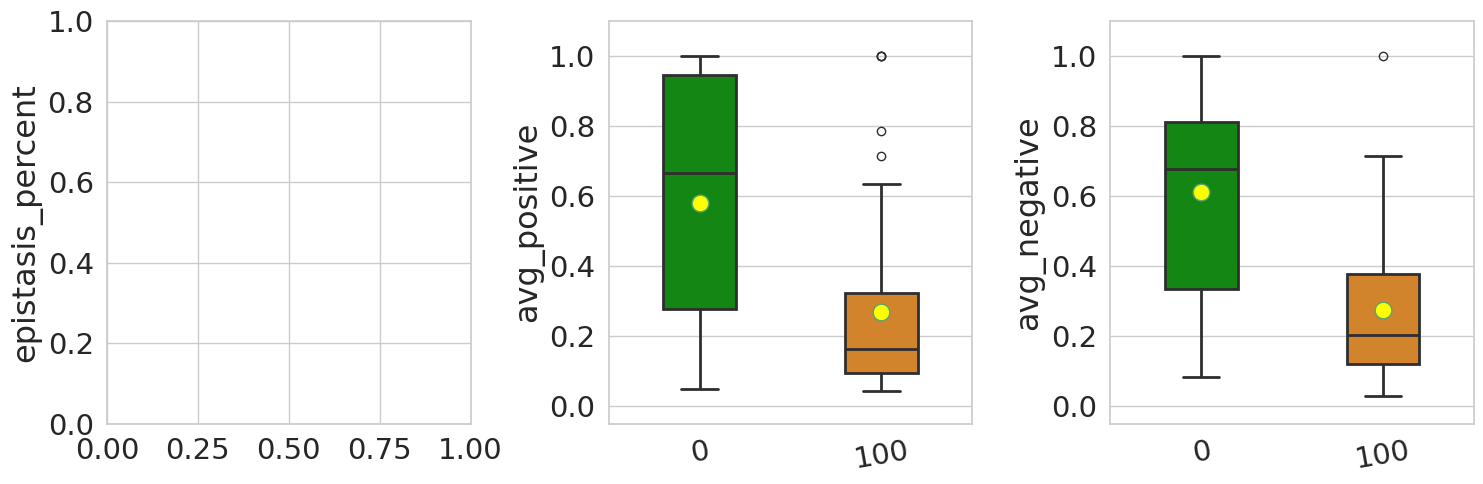

>> reg2m2

Metric: epistasis_percent, p-value: 0.0

Metric: avg_positive, p-value: 0.0008

Metric: avg_negative, p-value: 0.0001


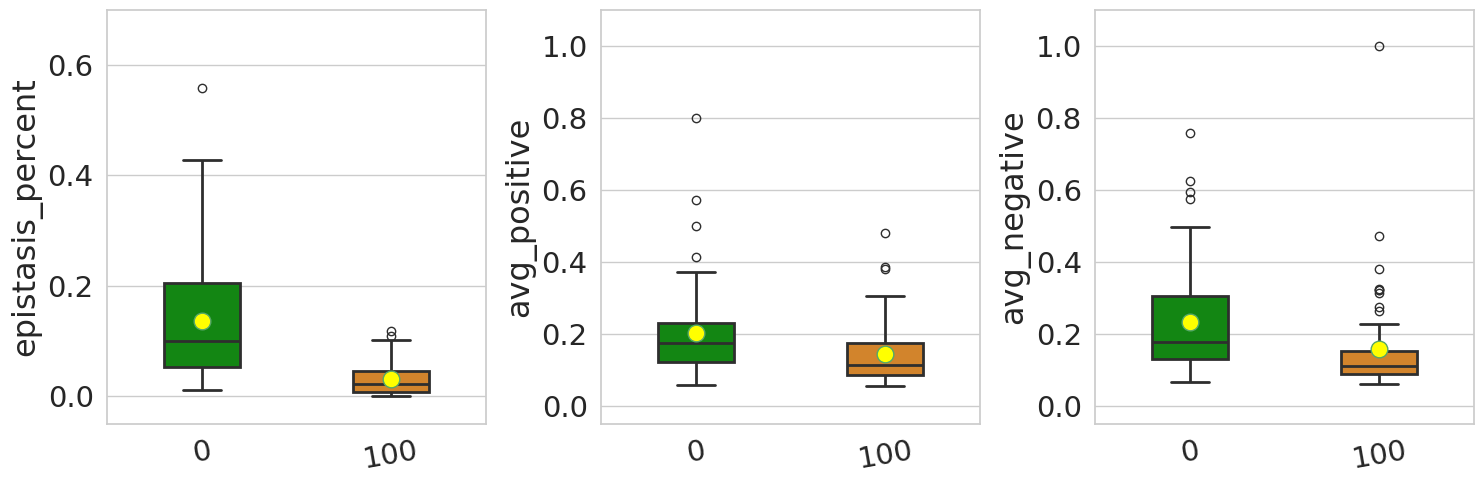

>>>>> symmetry
>> reg10m2

Metric: epistasis_percent, p-value: 0.187

Metric: avg_positive, p-value: 0.0

Metric: avg_negative, p-value: 0.0005


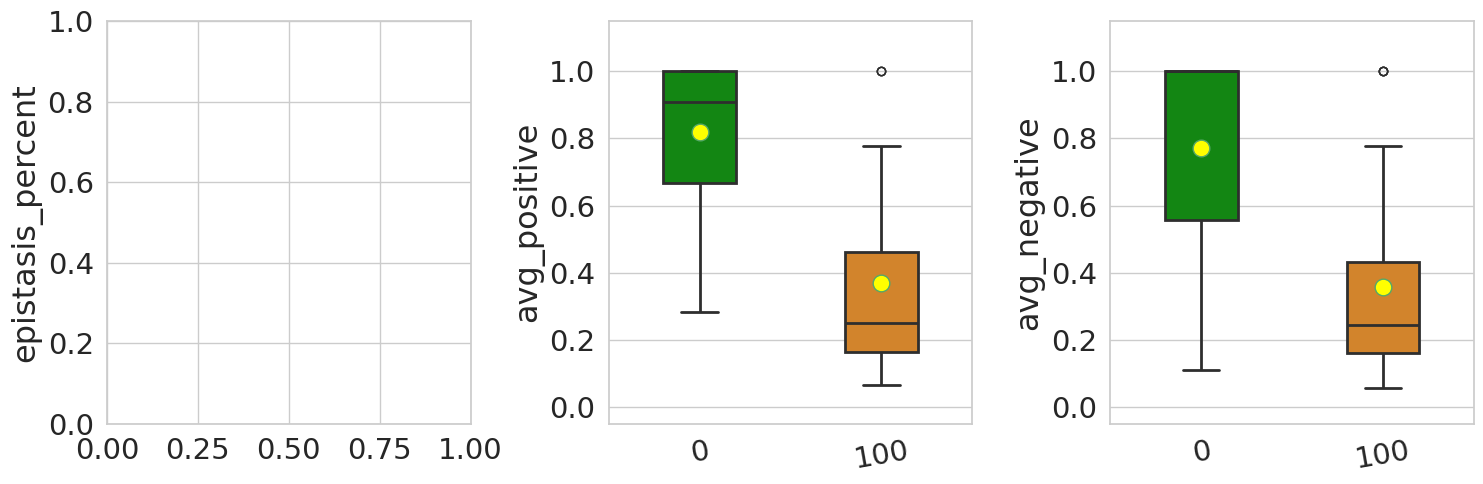

>> reg2m2

Metric: epistasis_percent, p-value: 0.0

Metric: avg_positive, p-value: 0.0

Metric: avg_negative, p-value: 0.0001


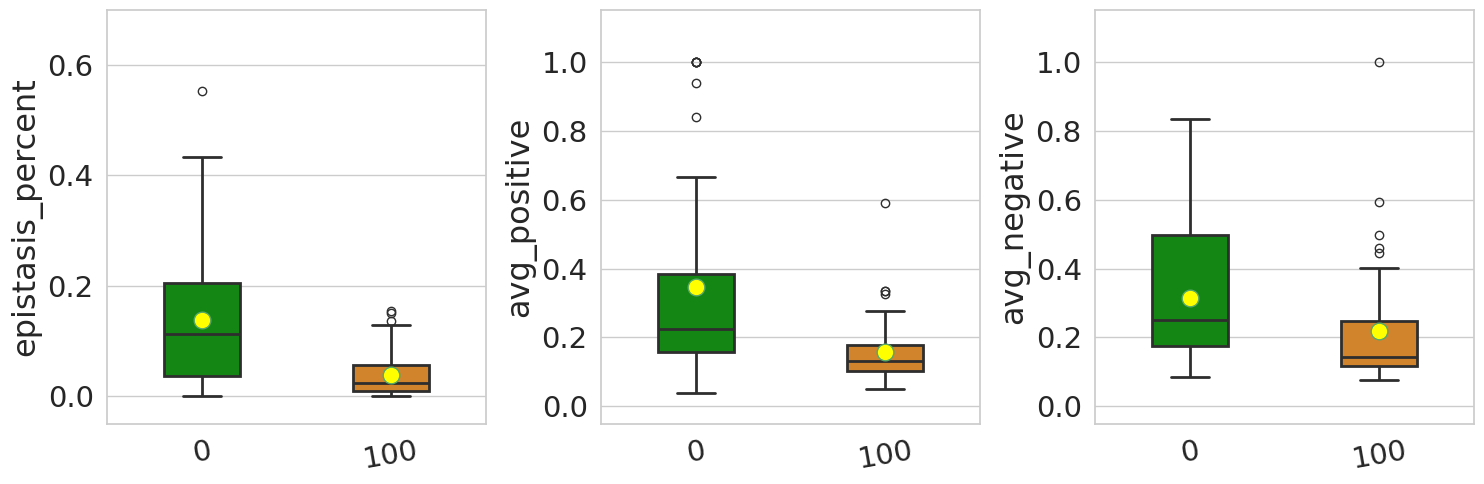

In [3]:
### EPISTASIS CHANGES ###

metrics = ['epistasis_percent',  'avg_positive',  'avg_negative']

clrs = ['#009900',
        '#EE8610']

avg_pos_scale = {'disp_y': [-0.5, 4],'extremities_prop': [-0.05, 1.1],'symmetry': [-0.05, 1.15], 'distance': [-0.5, 25]}

for trait in traits:
    print('>>>>>',trait)
    df_trait = df_traits[trait].copy(deep=True)
    

    for exp in experiments:
        print('>>',exp)
        df_trait_exp = df_trait[df_trait['experiment_name'] == exp]
        
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))  
        sb.set(rc={"axes.titlesize": 23, "axes.labelsize": 23, 'ytick.labelsize': 21, 'xtick.labelsize': 21})
        sb.set_style("whitegrid")
        
        for idx, metric in enumerate(metrics):
            ax = axes[idx]

            filtered_clean = df_trait_exp[pd.notna(df_trait_exp[metric])]
            ini_gen = filtered_clean[filtered_clean['gen'] == 0][f'{metric}']
            end_gen = filtered_clean[filtered_clean['gen'] == 100][f'{metric}']

            _, p_value = mannwhitneyu(ini_gen, end_gen, alternative='two-sided')
            print(f"\nMetric: {metric}, p-value: {round(p_value, 4)}")
            
            if p_value < 0.01:
    
                sb.boxplot(x='gen', y=f'{metric}', data=filtered_clean,
                           palette=clrs, width=0.4, showmeans=True, linewidth=2, fliersize=6,
                           meanprops={"marker": "o", "markerfacecolor": "yellow", "markersize": "12"}, ax=ax)
                
                if metric in ['epistasis_percent']:
                    ax.set_ylim(-0.05, 0.7)
    
                if metric == 'avg_positive' or metric == 'avg_negative':
                    if trait in avg_pos_scale.keys():
                        ax.set_ylim(avg_pos_scale[trait][0], avg_pos_scale[trait][1])
          
                ax.tick_params(axis='x', labelrotation=10)
            
            ax.set_xlabel('')
            ax.set_ylabel(f'{metric}')
       
        plt.tight_layout()
        plt.show()




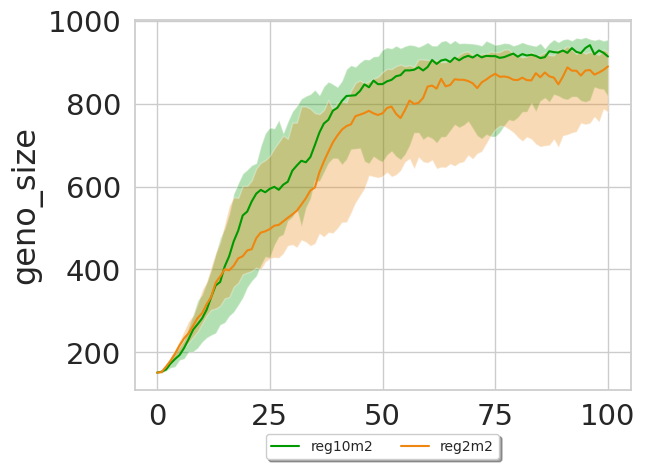

<Figure size 640x480 with 0 Axes>

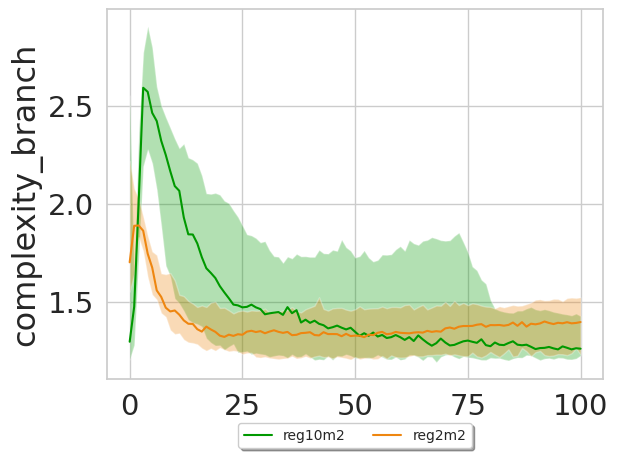

<Figure size 640x480 with 0 Axes>

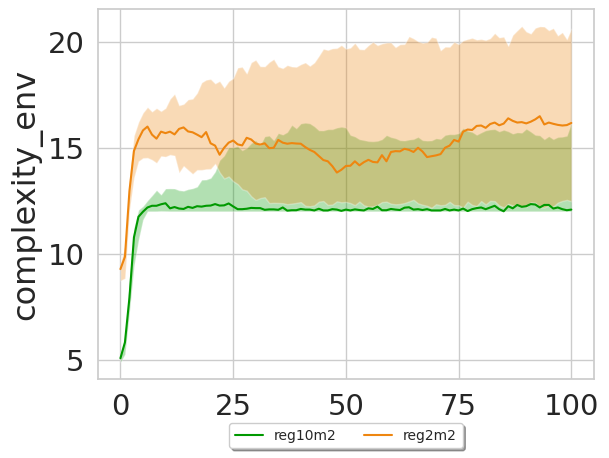

<Figure size 640x480 with 0 Axes>

In [4]:

### COMPLEXITY AND GENO SIZE PROGRESSION


df_complexity = pd.read_csv(f'{path}/complexity/complexity.csv')

grouped = df_complexity.groupby(['experiment_name', 'run', 'gen'])
df_complexity_inner = grouped.agg({
    'geno_size': 'mean',
    'complexity_branch': 'mean',
    'complexity_env': 'mean'
})
df_complexity_inner = df_complexity_inner.reset_index()

q1 = lambda x: x.quantile(0.25)
q3 = lambda x: x.quantile(0.75)

grouped = df_complexity_inner.groupby(['experiment_name', 'gen'])
df_complexity_outer = grouped.agg({
    'geno_size': ['median', q1, q3],
    'complexity_branch': ['median', q1, q3],
    'complexity_env': ['median', q1, q3]
})
df_complexity_outer.columns = [
    ('geno_size', 'median'), ('geno_size', 'Q1'), ('geno_size', 'Q3'),
    ('complexity_branch', 'median'), ('complexity_branch', 'Q1'), ('complexity_branch', 'Q3'),
    ('complexity_env', 'median'), ('complexity_env', 'Q1'), ('complexity_env', 'Q3')
]
df_complexity_outer.columns = ['_'.join(col) for col in df_complexity_outer.columns]
df_complexity_outer = df_complexity_outer.reset_index()

metrics = ['geno_size', 'complexity_branch', 'complexity_env']
for metric in metrics:

    font = {'font.size': 20}
    plt.rcParams.update(font)
    fig, ax = plt.subplots()

    plt.xlabel('')
    plt.ylabel(f'{metric}')

    for idx_experiment, exp in enumerate(experiments):
        metric_exp = df_complexity_outer[df_complexity_outer['experiment_name'] == exp]
       # display(metric_exp)

        ax.plot(metric_exp['gen'], metric_exp[f'{metric}_median'],
                    label=f'{exp}', c=clrs[idx_experiment])
        ax.fill_between(metric_exp['gen'],
                        metric_exp[f'{metric}_Q1'],
                        metric_exp[f'{metric}_Q3'],
                        alpha=0.3, facecolor=clrs[idx_experiment])
        
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),  fancybox=True, shadow=True, ncol=5, fontsize=10)

    plt.show()
    plt.clf()
    plt.close(fig)





>> reg10m2


,epistasis_percent_disp_y,avg_positive_disp_y,avg_negative_disp_y,epistasis_percent_distance,avg_positive_distance,avg_negative_distance,epistasis_percent_extremities_prop,avg_positive_extremities_prop,avg_negative_extremities_prop,epistasis_percent_symmetry,avg_positive_symmetry,avg_negative_symmetry,complexity_net
disp_y,-0.030921,0.876543,0.494076,-0.011203,-0.111513,0.286519,0.078876,-0.444622,0.025098,0.052927,-0.182158,0.306437,0.481816
complexity_branch,0.050818,0.114844,0.468249,0.018745,0.335589,-0.323964,0.124352,-0.334595,-0.295225,0.102406,-0.017874,-0.218173,-0.156546
complexity_env,0.269297,0.072006,0.490680,0.324572,0.403429,-0.282425,0.435512,-0.305664,-0.240780,0.418855,0.165896,-0.458342,-0.106288
complexity_net,-0.086787,0.420781,0.143035,-0.057028,0.020994,0.374894,-0.060827,-0.420530,0.093368,0.004109,-0.396436,0.437916,1.000000


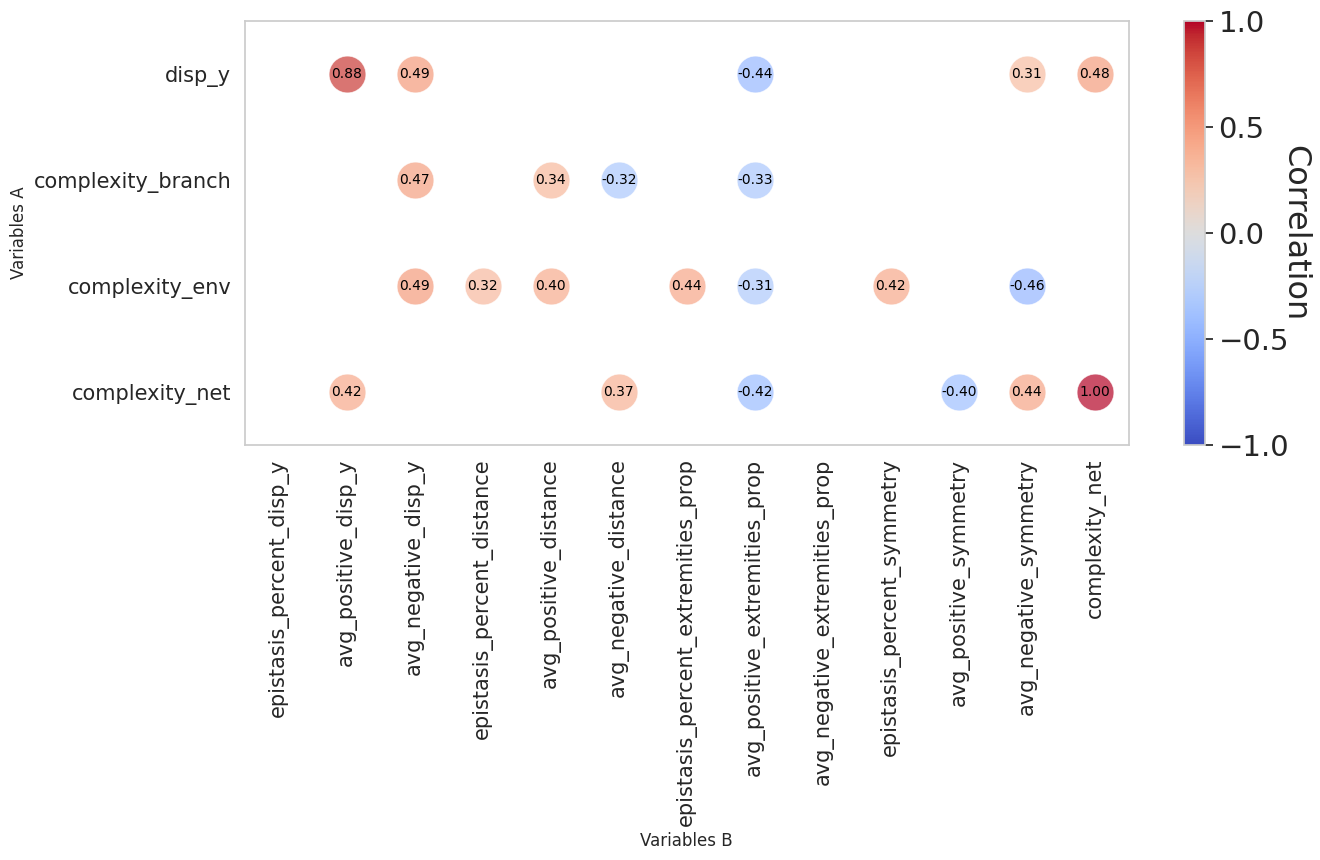

>> reg2m2


,epistasis_percent_disp_y,avg_positive_disp_y,avg_negative_disp_y,epistasis_percent_distance,avg_positive_distance,avg_negative_distance,epistasis_percent_extremities_prop,avg_positive_extremities_prop,avg_negative_extremities_prop,epistasis_percent_symmetry,avg_positive_symmetry,avg_negative_symmetry,complexity_net
disp_y,-0.370184,0.546717,0.583398,-0.364774,0.646349,0.133058,-0.303512,0.308062,-0.015346,-0.337477,0.194695,0.014850,-0.191721
complexity_branch,0.040760,0.327164,-0.150074,0.049028,-0.067525,-0.073359,0.024170,-0.061120,-0.291861,0.040845,0.380958,-0.090898,0.129488
complexity_env,0.386361,0.272651,-0.168061,0.377196,-0.133093,-0.339606,0.198732,-0.245739,-0.413876,0.378976,0.042476,-0.602257,0.260221
complexity_net,-0.225788,0.183220,-0.461557,-0.241001,-0.259093,-0.394292,-0.332950,0.067314,-0.094362,-0.178573,-0.009870,-0.081550,1.000000


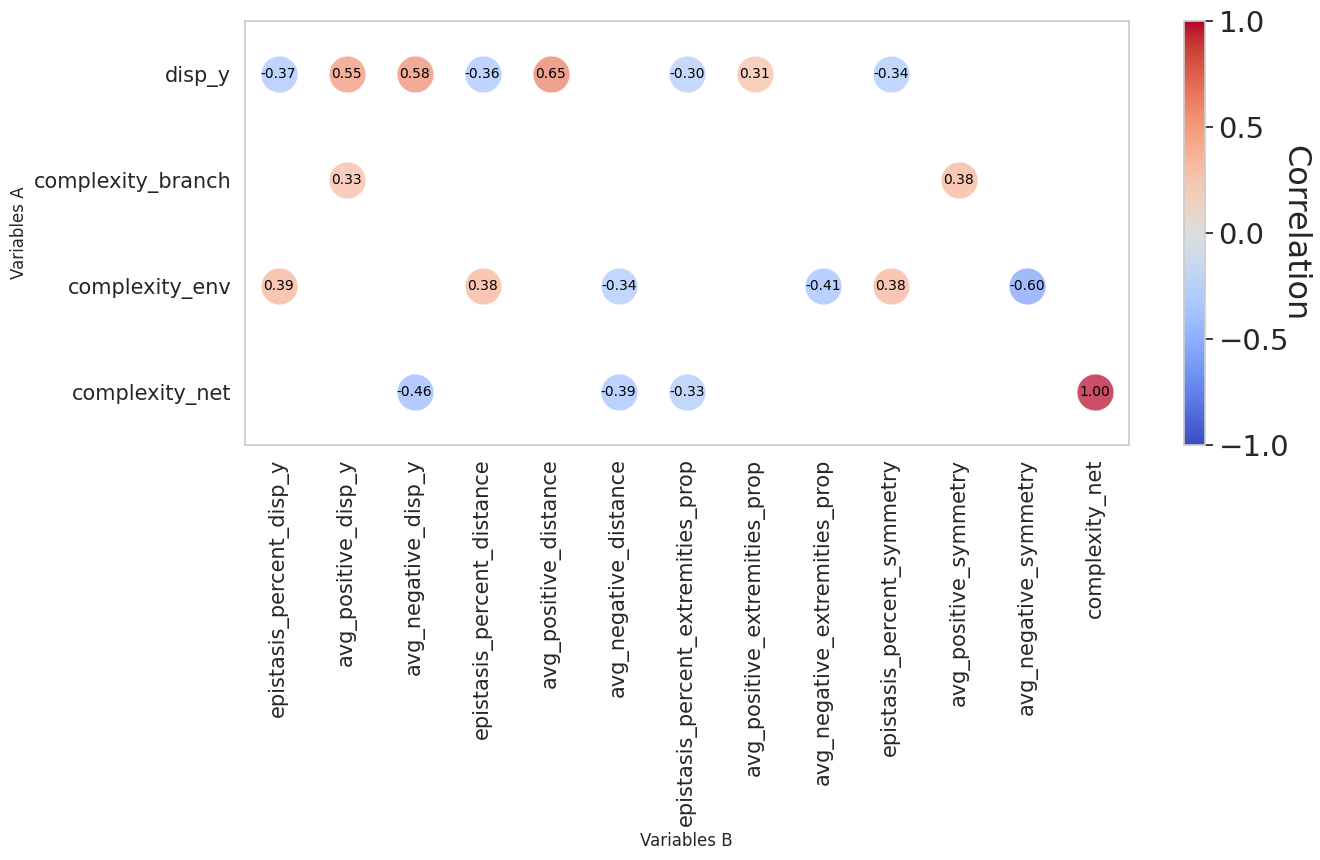

In [53]:
### CORRELATIONS: EPISTASIS VS PHENOCOMPLEXITY

keys = ['experiment_name', 'run', 'gen', 'individual_id']

df_complexity_net = pd.read_csv(f'{path}/complexity/complexity_net.csv').drop(columns=['ranking'])
df_complexity_all = pd.merge(df_complexity, df_complexity_net, on=keys, how='inner')

df_complexity_end = df_complexity_all[(df_complexity_all['gen'] == 100)]

#metrics1 = ['disp_y','geno_size', 'complexity_branch', 'complexity_env', 'complexity_net']
metrics1 = ['disp_y', 'complexity_branch', 'complexity_env', 'complexity_net']

metrics2 = []

for idx,trait in enumerate(traits):
    df_trait = df_traits[trait].copy(deep=True) 
    df_trait = df_trait.drop(columns=['Unnamed: 0'])

    corr_df = pd.merge(df_complexity_end, df_trait, on=keys, how='inner')
    corr_df = corr_df.rename(columns={'epistasis_percent': 'epistasis_percent_'+trait, 
                                      'avg_positive': 'avg_positive_'+trait, 
                                      'avg_negative': 'avg_negative_'+trait})
    metrics2.append('epistasis_percent_'+trait)
    metrics2.append('avg_positive_'+trait)
    metrics2.append('avg_negative_'+trait)
   
    corr_df['complexity_net'] = corr_df['complexity_net']/ corr_df['geno_size']

    obsolete_vars = ['symmetry', 'extremities_prop' ,'neutral', 'positive', 'negative', 'epistasis']
    redudant_vars = [ 'ranking', 'disp_y', 'geno_size','complexity_env','complexity_branch', 'complexity_net']

    if idx == 0:
        corr_df_all = corr_df.drop(columns=obsolete_vars)
    else:
        corr_df = corr_df.drop(columns=obsolete_vars+redudant_vars)
        corr_df_all = pd.merge(corr_df_all, corr_df, on=keys, how='inner')

    
for idx_experiment, exp in enumerate(experiments):
    print('>>', exp)
    df_complexity_end_exp = corr_df_all[(corr_df_all['experiment_name'] == exp)]
    df_complexity_end_exp = df_complexity_end_exp[ (df_complexity_end_exp['ranking'] == 'best') ] 
    #display(df_complexity_end_exp)

    corr_matrix = df_complexity_end_exp[metrics1+metrics2].corr()
    #corr_matrix = corr_matrix.loc[metrics1, metrics2+['complexity_net', 'geno_size', 'disp_y'] ] 
    corr_matrix = corr_matrix.loc[metrics1, metrics2+['complexity_net'] ] 
    display(corr_matrix)

    ##################################
    # Filter out correlations below the threshold
    threshold = 0.3
    filtered_corr_matrix = corr_matrix.copy()
    filtered_corr_matrix[abs(filtered_corr_matrix) < threshold] = np.nan
    
    # Create a figure
    fig, ax = plt.subplots(figsize=(14, 9))
    
    # Define color map and normalization
    cmap = plt.get_cmap('coolwarm')
    norm = plt.Normalize(vmin=-1, vmax=1)
   
    # Plot each circle based on the filtered correlation matrix
    for i, var_a in enumerate(filtered_corr_matrix.index):
        for j, var_b in enumerate(filtered_corr_matrix.columns):
            corr_value = filtered_corr_matrix.loc[var_a, var_b]
            if not np.isnan(corr_value):
                size = abs(corr_value) * 3000  # Scale size of the circle
                color = cmap(norm(corr_value))  # Map correlation to color (blue to red)
                
                # Plot a circle at the grid position
                ax.scatter(j, i, color=color, alpha=0.7, edgecolors='w', linewidth=0.5, s=700) #, s=size )
                ax.text(j, i, f'{corr_value:.2f}', color='black', fontsize=10, ha='center', va='center')
    
    # Set labels and title
    ax.set_xticks(range(len(filtered_corr_matrix.columns)))
    ax.set_yticks(range(len(filtered_corr_matrix.index)))
    ax.set_xticklabels(filtered_corr_matrix.columns, rotation=90, fontsize=15)  # Smaller font size
    ax.set_yticklabels(filtered_corr_matrix.index, fontsize=15)  # Smaller font size
    ax.set_xlabel('Variables B', size=12)
    ax.set_ylabel('Variables A', size=12)
    ax.set_title('', size=16)
    
    # Adjust the spacing between plot elements
    ax.set_xlim(-0.5, len(filtered_corr_matrix.columns) - 0.5)  # Ensure circles don't go out of bounds horizontally
    ax.set_ylim(len(filtered_corr_matrix.index) - 0.5, -0.5)   # Ensure circles don't go out of bounds vertically
    
    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-1, vmax=1))
    cbar = plt.colorbar(sm)
    cbar.set_label('Correlation', rotation=270, labelpad=15)
    
    # Add size legend
    #sizes = [100, 500, 1000]  # Sizes for the legend
    #size_labels = [f'{size/1000:.1f}' for size in sizes]
    #patches = [mpatches.Circle((0, 0), radius=np.sqrt(size/1000), color='grey', alpha=0.7) for size in sizes]
    #ax.legend(patches, size_labels, title="Correlation Strength", title_fontsize='13', loc='upper right', fontsize='10', frameon=False)
    
    # Show the plot
    plt.grid(False)
    plt.tight_layout()
    plt.show()




 >>>>> geno_size

 >>> reg10m2


,experiment_name,run,gen,individual_id,disp_y,geno_size,complexity_env,complexity_branch,complexity_net,ranking,avg_positive_disp_y,avg_negative_disp_y,epistasis_percent_disp_y,avg_positive_distance,avg_negative_distance,epistasis_percent_distance,avg_positive_extremities_prop,avg_negative_extremities_prop,epistasis_percent_extremities_prop,avg_positive_symmetry,avg_negative_symmetry,epistasis_percent_symmetry
60,reg10m2,1,100,9776,2.182697,837,12,1.250000,0.955795,best,1.534372,0.735045,0.020690,4.395833,4.214286,0.017691,0.053224,0.171487,0.018141,0.256977,0.360421,0.014843
62,reg10m2,2,100,8710,3.070760,999,12,1.187500,2.730731,best,3.836522,0.514270,0.000514,NaN,10.500000,0.000811,0.133333,0.457143,0.000709,NaN,NaN,0.000000
64,reg10m2,3,100,10006,1.420073,1001,12,1.187500,1.564436,best,0.690061,NaN,0.000763,4.000000,12.666667,0.000763,NaN,0.354921,0.000545,0.111111,0.666667,0.000654
66,reg10m2,4,100,9807,1.875566,1000,12,1.187500,0.982000,best,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000
68,reg10m2,5,100,9733,1.090487,1000,12,1.187500,1.608000,best,0.683803,0.412477,0.021094,4.278689,9.281481,0.020436,0.186303,0.682540,0.006047,0.158569,0.290187,0.005839
70,reg10m2,6,100,9410,1.932541,1001,4,1.000000,2.564436,best,1.427300,0.953197,0.003486,9.000000,12.370370,0.003377,0.210317,0.135714,0.002614,NaN,NaN,0.000000
74,reg10m2,8,100,9944,0.885799,226,12,1.333333,0.039823,best,0.786126,0.474572,0.008065,7.000000,3.000000,0.006048,0.555556,0.133333,0.008065,NaN,NaN,0.000000
76,reg10m2,9,100,9314,2.705512,1000,12,1.230769,1.256000,best,2.234717,1.265925,0.003591,4.666667,9.115385,0.003254,NaN,NaN,0.000000,NaN,NaN,0.000000
80,reg10m2,11,100,9851,0.633508,660,12,1.187500,0.704545,best,0.238223,0.089222,0.035005,2.739130,4.513514,0.035005,0.334184,0.159664,0.008098,0.173884,0.106494,0.011755
84,reg10m2,13,100,9869,0.443421,316,12,2.500000,0.911392,best,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000


Average of 'b' in the first : 783.5714285714286
Average of 'b' in the second : 949.0
  p-value: 0.089


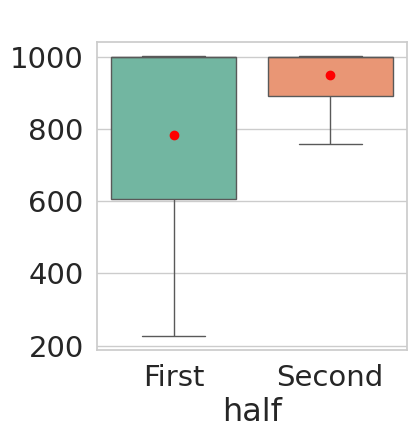


 >>> reg2m2


,experiment_name,run,gen,individual_id,disp_y,geno_size,complexity_env,complexity_branch,complexity_net,ranking,avg_positive_disp_y,avg_negative_disp_y,epistasis_percent_disp_y,avg_positive_distance,avg_negative_distance,epistasis_percent_distance,avg_positive_extremities_prop,avg_negative_extremities_prop,epistasis_percent_extremities_prop,avg_positive_symmetry,avg_negative_symmetry,epistasis_percent_symmetry
0,reg2m2,1,100,8884,1.684574,806,6,1.055556,3.137717,best,1.123305,0.499060,0.032712,6.050000,11.527950,0.028603,0.105176,0.226422,0.022598,0.226637,0.383648,0.021966
2,reg2m2,2,100,9287,2.420471,1000,12,1.187500,3.047000,best,1.349582,0.822449,0.013033,3.807018,2.812500,0.010948,NaN,0.071429,0.002398,0.132850,0.144237,0.003962
8,reg2m2,5,100,9535,2.177725,633,12,1.187500,2.647709,best,1.233863,1.012151,0.037889,7.783784,8.340206,0.035819,0.257143,0.275510,0.005881,0.175223,0.210936,0.009623
10,reg2m2,6,100,9236,2.752592,499,12,1.600000,1.787575,best,1.170823,0.415710,0.038789,3.454545,5.333333,0.034953,0.183240,0.116624,0.033248,NaN,0.302945,0.004689
22,reg2m2,12,100,9169,1.826460,846,12,1.187500,2.773050,best,1.086054,0.470414,0.064987,1.783784,2.790769,0.053345,0.142857,NaN,0.000589,0.050505,0.095177,0.002505
24,reg2m2,13,100,7605,2.416982,302,12,1.428571,1.175497,best,1.911262,0.516693,0.072482,3.727273,6.039216,0.075610,0.304730,0.173469,0.039024,0.198573,0.261657,0.042683
26,reg2m2,14,100,9995,3.543763,295,12,1.187500,0.359322,best,NaN,3.555440,0.001161,20.000000,NaN,0.001161,NaN,NaN,0.000000,NaN,0.111111,0.001161
28,reg2m2,15,100,9914,2.509492,1000,14,1.461538,3.209000,best,1.173685,0.894811,0.005750,5.818182,8.647059,0.004975,0.175325,0.107143,0.003870,0.112637,0.212780,0.003317
34,reg2m2,18,100,9764,2.396047,895,16,1.266667,3.739665,best,1.524991,0.346284,0.099266,3.605263,4.922936,0.086415,0.088360,0.107710,0.042486,0.106982,0.117255,0.074482
36,reg2m2,19,100,5654,2.080221,340,12,1.333333,1.452941,best,1.145897,0.909301,0.070305,4.000000,4.576271,0.066605,0.182540,0.106024,0.055504,0.104662,0.305104,0.014801


Average of 'b' in the first : 722.8823529411765
Average of 'b' in the second : 806.7692307692307
  p-value: 0.3896


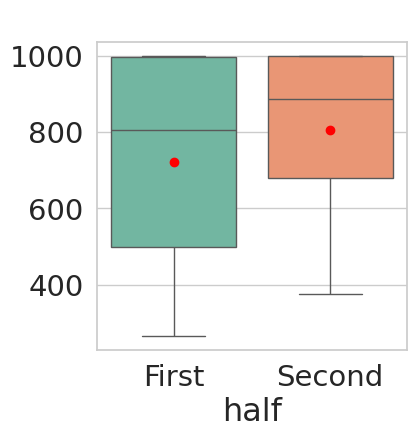


 >>>>> complexity_net

 >>> reg10m2


,experiment_name,run,gen,individual_id,disp_y,geno_size,complexity_env,complexity_branch,complexity_net,ranking,avg_positive_disp_y,avg_negative_disp_y,epistasis_percent_disp_y,avg_positive_distance,avg_negative_distance,epistasis_percent_distance,avg_positive_extremities_prop,avg_negative_extremities_prop,epistasis_percent_extremities_prop,avg_positive_symmetry,avg_negative_symmetry,epistasis_percent_symmetry
60,reg10m2,1,100,9776,2.182697,837,12,1.250000,0.955795,best,1.534372,0.735045,0.020690,4.395833,4.214286,0.017691,0.053224,0.171487,0.018141,0.256977,0.360421,0.014843
62,reg10m2,2,100,8710,3.070760,999,12,1.187500,2.730731,best,3.836522,0.514270,0.000514,NaN,10.500000,0.000811,0.133333,0.457143,0.000709,NaN,NaN,0.000000
64,reg10m2,3,100,10006,1.420073,1001,12,1.187500,1.564436,best,0.690061,NaN,0.000763,4.000000,12.666667,0.000763,NaN,0.354921,0.000545,0.111111,0.666667,0.000654
66,reg10m2,4,100,9807,1.875566,1000,12,1.187500,0.982000,best,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000
68,reg10m2,5,100,9733,1.090487,1000,12,1.187500,1.608000,best,0.683803,0.412477,0.021094,4.278689,9.281481,0.020436,0.186303,0.682540,0.006047,0.158569,0.290187,0.005839
70,reg10m2,6,100,9410,1.932541,1001,4,1.000000,2.564436,best,1.427300,0.953197,0.003486,9.000000,12.370370,0.003377,0.210317,0.135714,0.002614,NaN,NaN,0.000000
74,reg10m2,8,100,9944,0.885799,226,12,1.333333,0.039823,best,0.786126,0.474572,0.008065,7.000000,3.000000,0.006048,0.555556,0.133333,0.008065,NaN,NaN,0.000000
76,reg10m2,9,100,9314,2.705512,1000,12,1.230769,1.256000,best,2.234717,1.265925,0.003591,4.666667,9.115385,0.003254,NaN,NaN,0.000000,NaN,NaN,0.000000
80,reg10m2,11,100,9851,0.633508,660,12,1.187500,0.704545,best,0.238223,0.089222,0.035005,2.739130,4.513514,0.035005,0.334184,0.159664,0.008098,0.173884,0.106494,0.011755
84,reg10m2,13,100,9869,0.443421,316,12,2.500000,0.911392,best,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000


Average of 'b' in the first : 1.3347632784353345
Average of 'b' in the second : 1.3667784276089017
  p-value: 0.8947


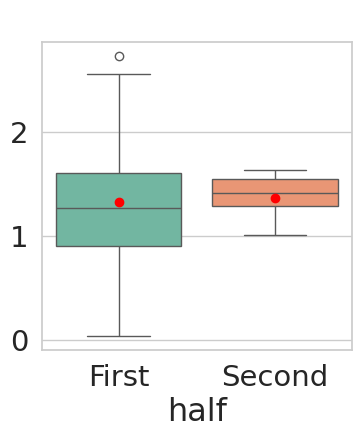


 >>> reg2m2


,experiment_name,run,gen,individual_id,disp_y,geno_size,complexity_env,complexity_branch,complexity_net,ranking,avg_positive_disp_y,avg_negative_disp_y,epistasis_percent_disp_y,avg_positive_distance,avg_negative_distance,epistasis_percent_distance,avg_positive_extremities_prop,avg_negative_extremities_prop,epistasis_percent_extremities_prop,avg_positive_symmetry,avg_negative_symmetry,epistasis_percent_symmetry
0,reg2m2,1,100,8884,1.684574,806,6,1.055556,3.137717,best,1.123305,0.499060,0.032712,6.050000,11.527950,0.028603,0.105176,0.226422,0.022598,0.226637,0.383648,0.021966
2,reg2m2,2,100,9287,2.420471,1000,12,1.187500,3.047000,best,1.349582,0.822449,0.013033,3.807018,2.812500,0.010948,NaN,0.071429,0.002398,0.132850,0.144237,0.003962
8,reg2m2,5,100,9535,2.177725,633,12,1.187500,2.647709,best,1.233863,1.012151,0.037889,7.783784,8.340206,0.035819,0.257143,0.275510,0.005881,0.175223,0.210936,0.009623
10,reg2m2,6,100,9236,2.752592,499,12,1.600000,1.787575,best,1.170823,0.415710,0.038789,3.454545,5.333333,0.034953,0.183240,0.116624,0.033248,NaN,0.302945,0.004689
22,reg2m2,12,100,9169,1.826460,846,12,1.187500,2.773050,best,1.086054,0.470414,0.064987,1.783784,2.790769,0.053345,0.142857,NaN,0.000589,0.050505,0.095177,0.002505
24,reg2m2,13,100,7605,2.416982,302,12,1.428571,1.175497,best,1.911262,0.516693,0.072482,3.727273,6.039216,0.075610,0.304730,0.173469,0.039024,0.198573,0.261657,0.042683
26,reg2m2,14,100,9995,3.543763,295,12,1.187500,0.359322,best,NaN,3.555440,0.001161,20.000000,NaN,0.001161,NaN,NaN,0.000000,NaN,0.111111,0.001161
28,reg2m2,15,100,9914,2.509492,1000,14,1.461538,3.209000,best,1.173685,0.894811,0.005750,5.818182,8.647059,0.004975,0.175325,0.107143,0.003870,0.112637,0.212780,0.003317
34,reg2m2,18,100,9764,2.396047,895,16,1.266667,3.739665,best,1.524991,0.346284,0.099266,3.605263,4.922936,0.086415,0.088360,0.107710,0.042486,0.106982,0.117255,0.074482
36,reg2m2,19,100,5654,2.080221,340,12,1.333333,1.452941,best,1.145897,0.909301,0.070305,4.000000,4.576271,0.066605,0.182540,0.106024,0.055504,0.104662,0.305104,0.014801


Average of 'b' in the first : 2.9255861489430632
Average of 'b' in the second : 3.2382482210587207
  p-value: 0.5671


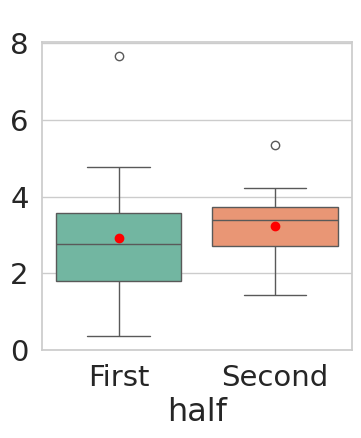


 >>>>> disp_y

 >>> reg10m2


,experiment_name,run,gen,individual_id,disp_y,geno_size,complexity_env,complexity_branch,complexity_net,ranking,avg_positive_disp_y,avg_negative_disp_y,epistasis_percent_disp_y,avg_positive_distance,avg_negative_distance,epistasis_percent_distance,avg_positive_extremities_prop,avg_negative_extremities_prop,epistasis_percent_extremities_prop,avg_positive_symmetry,avg_negative_symmetry,epistasis_percent_symmetry
60,reg10m2,1,100,9776,2.182697,837,12,1.250000,0.955795,best,1.534372,0.735045,0.020690,4.395833,4.214286,0.017691,0.053224,0.171487,0.018141,0.256977,0.360421,0.014843
62,reg10m2,2,100,8710,3.070760,999,12,1.187500,2.730731,best,3.836522,0.514270,0.000514,NaN,10.500000,0.000811,0.133333,0.457143,0.000709,NaN,NaN,0.000000
64,reg10m2,3,100,10006,1.420073,1001,12,1.187500,1.564436,best,0.690061,NaN,0.000763,4.000000,12.666667,0.000763,NaN,0.354921,0.000545,0.111111,0.666667,0.000654
66,reg10m2,4,100,9807,1.875566,1000,12,1.187500,0.982000,best,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000
68,reg10m2,5,100,9733,1.090487,1000,12,1.187500,1.608000,best,0.683803,0.412477,0.021094,4.278689,9.281481,0.020436,0.186303,0.682540,0.006047,0.158569,0.290187,0.005839
70,reg10m2,6,100,9410,1.932541,1001,4,1.000000,2.564436,best,1.427300,0.953197,0.003486,9.000000,12.370370,0.003377,0.210317,0.135714,0.002614,NaN,NaN,0.000000
74,reg10m2,8,100,9944,0.885799,226,12,1.333333,0.039823,best,0.786126,0.474572,0.008065,7.000000,3.000000,0.006048,0.555556,0.133333,0.008065,NaN,NaN,0.000000
76,reg10m2,9,100,9314,2.705512,1000,12,1.230769,1.256000,best,2.234717,1.265925,0.003591,4.666667,9.115385,0.003254,NaN,NaN,0.000000,NaN,NaN,0.000000
80,reg10m2,11,100,9851,0.633508,660,12,1.187500,0.704545,best,0.238223,0.089222,0.035005,2.739130,4.513514,0.035005,0.334184,0.159664,0.008098,0.173884,0.106494,0.011755
84,reg10m2,13,100,9869,0.443421,316,12,2.500000,0.911392,best,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000


Average of 'b' in the first : 1.5274518347717583
Average of 'b' in the second : 1.6382927263879952
  p-value: 0.6614


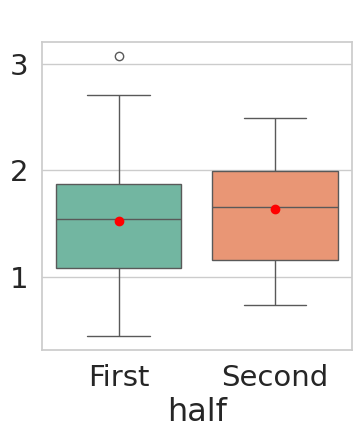


 >>> reg2m2


,experiment_name,run,gen,individual_id,disp_y,geno_size,complexity_env,complexity_branch,complexity_net,ranking,avg_positive_disp_y,avg_negative_disp_y,epistasis_percent_disp_y,avg_positive_distance,avg_negative_distance,epistasis_percent_distance,avg_positive_extremities_prop,avg_negative_extremities_prop,epistasis_percent_extremities_prop,avg_positive_symmetry,avg_negative_symmetry,epistasis_percent_symmetry
0,reg2m2,1,100,8884,1.684574,806,6,1.055556,3.137717,best,1.123305,0.499060,0.032712,6.050000,11.527950,0.028603,0.105176,0.226422,0.022598,0.226637,0.383648,0.021966
2,reg2m2,2,100,9287,2.420471,1000,12,1.187500,3.047000,best,1.349582,0.822449,0.013033,3.807018,2.812500,0.010948,NaN,0.071429,0.002398,0.132850,0.144237,0.003962
8,reg2m2,5,100,9535,2.177725,633,12,1.187500,2.647709,best,1.233863,1.012151,0.037889,7.783784,8.340206,0.035819,0.257143,0.275510,0.005881,0.175223,0.210936,0.009623
10,reg2m2,6,100,9236,2.752592,499,12,1.600000,1.787575,best,1.170823,0.415710,0.038789,3.454545,5.333333,0.034953,0.183240,0.116624,0.033248,NaN,0.302945,0.004689
22,reg2m2,12,100,9169,1.826460,846,12,1.187500,2.773050,best,1.086054,0.470414,0.064987,1.783784,2.790769,0.053345,0.142857,NaN,0.000589,0.050505,0.095177,0.002505
24,reg2m2,13,100,7605,2.416982,302,12,1.428571,1.175497,best,1.911262,0.516693,0.072482,3.727273,6.039216,0.075610,0.304730,0.173469,0.039024,0.198573,0.261657,0.042683
26,reg2m2,14,100,9995,3.543763,295,12,1.187500,0.359322,best,NaN,3.555440,0.001161,20.000000,NaN,0.001161,NaN,NaN,0.000000,NaN,0.111111,0.001161
28,reg2m2,15,100,9914,2.509492,1000,14,1.461538,3.209000,best,1.173685,0.894811,0.005750,5.818182,8.647059,0.004975,0.175325,0.107143,0.003870,0.112637,0.212780,0.003317
34,reg2m2,18,100,9764,2.396047,895,16,1.266667,3.739665,best,1.524991,0.346284,0.099266,3.605263,4.922936,0.086415,0.088360,0.107710,0.042486,0.106982,0.117255,0.074482
36,reg2m2,19,100,5654,2.080221,340,12,1.333333,1.452941,best,1.145897,0.909301,0.070305,4.000000,4.576271,0.066605,0.182540,0.106024,0.055504,0.104662,0.305104,0.014801


Average of 'b' in the first : 2.1419793348485485
Average of 'b' in the second : 2.1401940275771683
  p-value: 0.9919


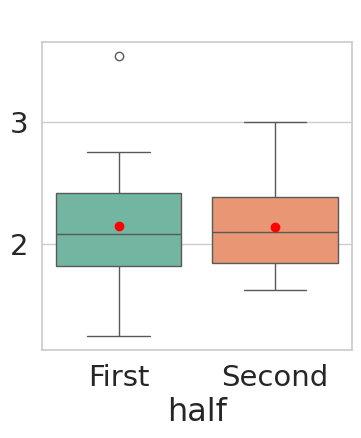

In [131]:

### COMPLEXITY VS SIZE 


metrics_dist = ['geno_size', 'complexity_net', 'disp_y']
metric_order = 'complexity_env'

for metric_dist in metrics_dist:
    print('\n >>>>>',metric_dist)
    for exp in experiments:
        print('\n >>>',exp)
        df_comp_g = corr_df_all[ (corr_df_all['experiment_name'] == exp) ] 
        df_comp_g = df_comp_g[ (df_comp_g['ranking'] == 'best') ] 
        #df_sorted = df_comp_g.sort_values(by=metric_order).reset_index(drop=True)
               
        first_half = df_comp_g[ (df_comp_g[metric_order] <20) ] 
        second_half = df_comp_g[ (df_comp_g[metric_order] >= 20) ] 
        
        # Calculate and display the averages for 'b' in each half
        avg_first_half = first_half[metric_dist].mean()
        avg_second_half = second_half[metric_dist].mean()
     #   display(first_half)
      #  display(second_half)
        print(f"Average of 'b' in the first : {avg_first_half}")
        print(f"Average of 'b' in the second : {avg_second_half}")
        
        t_stat, p_value = ttest_ind(first_half[metric_dist], second_half[metric_dist], equal_var=True)
       # _, p_value = wilcoxon(first_half[metric_dist], second_half[metric_dist])
        #_, p_value = mannwhitneyu(first_half[metric_dist], second_half[metric_dist], alternative='two-sided')
        print(f"  p-value: {round(p_value, 4)}")
        
        # Add a new column to each half to indicate "First Half" or "Second Half"
        first_half['half'] = 'First'
        second_half['half'] = 'Second'
        
        #  Concatenate the two halves back into a single DataFrame
        df_concat = pd.concat([first_half, second_half], ignore_index=True)
        
        # Plot variable 'disp_y' for each half using box plots
        plt.figure(figsize=(4, 4))
        sb.boxplot(x='half', y=metric_dist, data=df_concat, palette="Set2")
        
        plt.scatter(x=[0], y=[avg_first_half], color='red', label='Mean', zorder=5)
        plt.scatter(x=[1], y=[avg_second_half], color='red', zorder=5)
        
        plt.title(' ')
        plt.ylabel('' )
        plt.show() 


In [133]:
knockouts_measures = pd.read_csv(f'{path}/knockouts/data/knockouts_measures.csv')


['disp_y', 'distance', 'extremities_prop', 'symmetry']


In [210]:

####  CATEFGORIES OF EPSISTASIS 


def positive_and_zero(a, b):
    return (a > 0 and b == 0) or (a == 0 and b > 0)

def negative_and_zero(a, b):
    return (a < 0 and b == 0) or (a == 0 and b < 0)

def positive_positive(a, b):
    return a > 0 and b > 0

def negative_negative(a, b):
    return a < 0 and b < 0


original = 'o'  # original phenotype, without knockout
traits = ['disp_y']
keys = ['experiment_name', 'run', 'gen', 'ranking', 'individual_id']
others = ['knockout']
knockouts_measures = knockouts_measures.filter(items=keys + others + traits)

knockouts_measures = knockouts_measures[   ( ( knockouts_measures['experiment_name'] == 'reg10m2') \
                                      &    (knockouts_measures['run'] == 8)   \
                        &  (knockouts_measures['gen'] == 100 ) &  (knockouts_measures['ranking'] == 'best' )  ) ] # quick test

#df = df[((df['gen'] == generations[0]) | (df['gen'] == generations[-1]))]

for trait in traits:
    # sends trait values of each knockout to columns
    pivot_df = knockouts_measures.pivot_table(index=keys,
                              columns='knockout', values=trait,
                              # for distance variable, which is not a trait,
                              # the calculation is idle (compared to 0)
                              aggfunc='first')

    all_columns = pivot_df.columns
    knock_columns = [col for col in all_columns if col not in keys and col != original]
    
    # Subtract each knock_columns by the original
    # (positive values mean the mutant had an increase in the trait or growth)
    df_delta = pivot_df.drop(columns=original).sub(pivot_df[original], axis=0)
    
    double_knocks = [col for col in knock_columns if '.' in col]
    for mxy in double_knocks:
        genes = mxy.split('.')

        mx = genes[0]
        my = genes[1]
   
        df_delta[f'{mx}categ{my}'] = ''
        
        df_delta[f'{mx}categ{my}'] = df_delta.apply(
            lambda row: 'buffering' 
            if ( row[mx] == 0 and row[my] == 0 and row[mxy] > 0) or \
               ( row[mx] == 0 and row[my] == 0 and row[mxy] < 0)
            else row[f'{mx}categ{my}'], axis=1
        )

        df_delta[f'{mx}categ{my}'] = df_delta.apply(
            lambda row: 'supression' 
            if ( positive_positive(row[mx], row[my]) and row[mxy] == 0) or \
               ( positive_and_zero(row[mx], row[my]) and row[mxy] == 0) or \
               ( negative_negative(row[mx], row[my]) and row[mxy] == 0) or \
               ( negative_and_zero(row[mx], row[my]) and row[mxy] == 0)
            else row[f'{mx}categ{my}'], axis=1
        )

        df_delta[f'{mx}categ{my}'] = df_delta.apply(
            lambda row: 'quantitative_buffering' 
            if ( positive_positive(row[mx], row[my]) and row[mxy] > row[mx] and row[mxy] > row[my] ) or \
               ( positive_and_zero(row[mx], row[my]) and row[mxy] > row[mx] and row[mxy] > row[my] ) or \
               ( negative_negative(row[mx], row[my]) and row[mxy] < row[mx] and row[mxy] < row[my] ) or \
               ( negative_and_zero(row[mx], row[my]) and row[mxy] < row[mx] and row[mxy] < row[my] )
            else row[f'{mx}categ{my}'], axis=1
        )

        df_delta[f'{mx}categ{my}'] = df_delta.apply(
            lambda row: 'quantitative_supression' 
            if ( positive_positive(row[mx], row[my]) and row[mxy] < row[mx] and row[mxy] < row[my] and row[mxy] > 0) or \
               ( positive_and_zero(row[mx], row[my]) and row[mxy] < row[mx] and row[mxy] < row[my] and row[mxy] > 0 ) or \
               ( negative_negative(row[mx], row[my]) and row[mxy] > row[mx] and row[mxy] > row[my] and row[mxy] < 0) or \
               ( negative_and_zero(row[mx], row[my]) and row[mxy] > row[mx] and row[mxy] > row[my] and row[mxy] < 0) 
            else row[f'{mx}categ{my}'], axis=1
        )

        df_delta[f'{mx}categ{my}'] = df_delta.apply(
            lambda row: 'masking' 
            if ( ( ( row[mx] > 0 and  row[my] < 0) or ( row[mx] < 0 and row[my] > 0) ) \
                  and  row[mxy]  > 0)  or \
               ( ( ( row[mx] > 0 and  row[my] < 0) or ( row[mx]  < 0 and  row[my] > 0) ) \
                  and  row[mxy]  < 0)
            else row[f'{mx}categ{my}'], axis=1
        )

        df_delta[f'{mx}categ{my}'] = df_delta.apply(
            lambda row: 'inversion' 
            if ( positive_positive(row[mx], row[my]) and row[mxy] < 0) or \
               ( positive_and_zero(row[mx], row[my]) and row[mxy] < 0) or \
               ( negative_negative(row[mx], row[my]) and row[mxy] > 0) or \
               ( negative_and_zero(row[mx], row[my]) and row[mxy] > 0)  
            else row[f'{mx}categ{my}'], axis=1
        )

    
    categ_columns = [col for col in df_delta.columns if 'categ' in col]
    
    buffering = df_delta[categ_columns]  == 'buffering'
    supression = df_delta[categ_columns]  == 'supression'
    quantitative_buffering = df_delta[categ_columns]  == 'quantitative_buffering'
    quantitative_supression = df_delta[categ_columns]  == 'quantitative_supression'
    masking = df_delta[categ_columns]  == 'masking'
    inversion = df_delta[categ_columns]  == 'inversion'

    count_buffering = buffering.sum(axis=1)
    count_supression = supression.sum(axis=1)
    count_quantitative_buffering = quantitative_buffering.sum(axis=1)
    count_quantitative_supression = quantitative_supression.sum(axis=1)
    count_masking = masking.sum(axis=1)
    count_inversion = inversion.sum(axis=1)

    df_delta['buffering'] = count_buffering
    df_delta['supression'] = count_supression
    df_delta['quantitative_buffering'] = count_quantitative_buffering
    df_delta['quantitative_supression'] = count_quantitative_supression
    df_delta['masking'] = count_masking
    df_delta['inversion'] = count_inversion
    

    df_exp = df_delta.reset_index()[keys+['buffering', 'supression', 'quantitative_buffering', 'quantitative_supression', 'masking', 'inversion']]
    df_exp.to_csv(f'{path}/knockouts/data/effectscateg_{trait}.csv')

    print(trait)

disp_y


In [196]:

# #buffeering
# mx=0
# my=0
# mxy=1

# mx=0
# my=0
# mxy=-1

# #supression
# mx=1
# my=1
# mxy=0

# mx=1
# my=1
# mxy=0

# mx=-1
# my=-1
# mxy=0

# mx=-1
# my=0
# mxy=0

# wuant buff
# mx=1
# my=1
# mxy=2

# mx=1
# my=0
# mxy=2

# mx=-1
# my=0
# mxy=-2

# # masking
# mx=1
# my=-1
# mxy=1

# mx=1
# my=-1
# mxy=-1

# # inversion
# mx=1
# my=1
# mxy=-1

# mx=-1
# my=0
# mxy=1

# mx=-1
# my=-1
# mxy=1




def positive_and_zero(a, b):
    return (a > 0 and b == 0) or (a == 0 and b > 0)

def negative_and_zero(a, b):
    return (a < 0 and b == 0) or (a == 0 and b < 0)

def positive_positive(a, b):
    return a > 0 and b > 0

def negative_negative(a, b):
    return a < 0 and b < 0
    
if ( mx ==0 and my == 0 and mxy > 0) or \
   ( mx ==0 and my == 0 and mxy < 0):
    print('beffering')

if ( positive_positive(mx, my) and mxy == 0) or \
   ( positive_and_zero(mx, my) and mxy == 0) or \
   ( negative_negative(mx, my) and mxy == 0) or \
   ( negative_and_zero(mx, my) and mxy == 0) :
    print('supreesion')
          
if ( positive_positive(mx, my) and  mxy > mx and mxy > my ) or \
   ( positive_and_zero(mx, my) and  mxy > mx and mxy > my ) or \
   ( negative_negative(mx, my) and mxy < mx and mxy < my ) or \
   ( negative_and_zero(mx, my) and mxy < mx and mxy < my ) :
    print('quantitative_buffering')
    
if ( positive_positive(mx, my) and mxy < mx and mxy < my and mxy > 0) or \
   ( positive_and_zero(mx, my) and mxy < mx and mxy < my and mxy > 0 ) or \
   ( negative_negative(mx, my) and mxy > mx and mxy > my and mxy < 0) or \
   ( negative_and_zero(mx, my) and mxy > mx and mxy > my and mxy < 0) :
    print('quantitative_supression' )
    
if ( ( ( mx > 0 and  my < 0) or ( mx < 0 and my > 0) ) \
      and  mxy  > 0)  or \
   ( ( ( mx > 0 and  my < 0) or ( mx  < 0 and  my > 0) ) \
      and  mxy  < 0) :
    print('masking' )
    
if ( positive_positive(mx, my) and mxy < 0) or \
   ( positive_and_zero(mx, my) and mxy < 0) or \
   ( negative_negative(mx, my) and mxy > 0) or \
   ( negative_and_zero(mx, my) and mxy > 0) :
     print('inversion' )


supreesion
